#청와대 청원의 주제 분류
: 순환 신경망 이용   
##순차데이터
: 텍스트나 시계열 데이터와 같이 순서에 의미가 있는 데이터
- 기존 데이터와의 차이
  - 데이터의 순서가 중요함
  - 샘플링 편향을 막기위해 데이터 shuffle 불가
  - 이전 데이터를 기억해야함 
  
##피드포워드 신경망?
: 입력 데이터의 흐름이 앞으로만 전달되는 신경망  
    ex) 완전 연결 신경망, 합성곱 신경망...

##순환 신경망?
: 이전에 처리했던 샘플을 다음 샘플을 처리하는데 재사용하는 신경망
- 특징
  - 은닉층의 출력을 다음 스텝에 재사용함
  - 활성화 함수로 tanh^2 많이 사용됨
  



#**텍스트 분석**  



#셋업
- 필요한 것들을 import함
  - numpy
  - matplotlib
  - keras
  - google drive

## numpy, matplotlib, keras


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow import keras
import urllib.request
from collections import Counter

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## google drive

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip drive/MyDrive/cau_2021/data.zip 

Archive:  drive/MyDrive/cau_2021/data.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


##데이터 토큰화
1. 데이터 불러오기
2. 한국어 데이터를 토큰화하기 위하여 Mecab 설치
3. 중복 데이터 삭제
4. 데이터 정제
5. 정수 인코딩


---



1. 데이터 불러오기

In [ ]:
sample_submission_csv = pd.read_csv("sample_submission.csv")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#print(sample_submission)
#print(train)
#print(test)

print("train : {0}".format(len(train)))
print("test : {0}".format(len(test)))

train[:5]

train : 40000
test : 5000


,index,category,data
0,0,2,신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지...
1,1,0,학교이름에 '남자'도 붙여주세요. 울산여자중학교에 재학중인 학생입니다 최근 양성평등...
2,2,1,"빙상연맹, 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요.. 최근 동계올..."
3,3,1,"티비 12세,15세 관람가도 연령확인 의무화 하자.. 제기 에전에 티비를 보다가 잠..."
4,4,1,무더운 여름철엔 남성들도 시원한 자율복장을 해야. 무더운 여름철에는 남성들도 노넥타...


2. Mecab 설치

In [ ]:
# Colab에 Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
     |████████████████████████████████| 19.4 MB 193 kB/s 
     |████████████████████████████████| 448 kB 52.8 MB/s 
     |████████████████████████████████| 86 kB 5.9 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-08-30 20:36:41--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

3. 중복 데이터 삭제

In [ ]:
train

,index,category,data,tokenized
0,0,2,신혼부부위한 주택정책 보다 보육시설 늘려주세요 국민세금으로 일부를 위한 정책펴지 마...,"[신혼, 부부, 주택, 보육, 시설, 늘려, 세금, 일부, 펴, 마시, 보편, 모든..."
1,1,0,학교이름에 남자도 붙여주세요 울산여자중학교에 재학중인 학생입니다 최근 양성평등 글짓...,"[학교, 이름, 남자, 붙여, 울산, 여자, 중학교, 재학, 학생, 최근, 양성, ..."
2,2,1,빙상연맹 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요 최근 동계올림픽에...,"[빙상, 연맹, 축구, 협회, 각종, 체육, 협회, 비리, 철저, 밝혀, 최근, 동..."
3,3,1,티비 세세 관람가도 연령확인 의무화 하자 제기 에전에 티비를 보다가 잠시 딴일이 생...,"[티비, 세세, 관람, 연령, 확인, 의무, 제기, 티비, 다가, 잠시, 딴, 생겨..."
4,4,1,무더운 여름철엔 남성들도 시원한 자율복장을 해야 무더운 여름철에는 남성들도 노넥타이...,"[무더운, 여름철, 엔, 남성, 시원, 자율, 복장, 무더운, 여름철, 남성, 노,..."
...,...,...,...,...
39995,39995,2,시간유연근무제 저는 국립대에서 일하고 있는 비정규직 근로자입니다동시에 두 자녀의 ...,"[시간, 유연근, 무제, 국립대, 비정규직, 근로자, 동시, 두, 자녀, 엄마, 시..."
39996,39996,0,소년법을 폐지해 주시고 부산 여중생 가해자 학생들의 강력한 처벌을 요구합니다 소년법...,"[소년법, 폐지, 부산, 여중, 생, 가해자, 학생, 강력, 처벌, 요구, 소년법,..."
39997,39997,2,무서운데 지켜야 할게 있어요 도와주세요 안녕하세요 한부모엄마 입니다양육비를 받고 ...,"[무서운, 데, 지켜야, 어요, 도와, 안녕, 부모, 엄마, 양육비, 싶, 양육비,..."
39998,39998,2,교복에 고정식 이름표를 달게 하는 것을 금지해 주세요 교복에 이름표를 박아놓아 탈...,"[교복, 고정식, 이름표, 달, 금지, 교복, 이름표, 박, 놓, 탈, 부착, 놓,..."


In [ ]:
#중복 데이터 확인
print(len(train['data']),"개 중",len(train['data']) - train['data'].nunique()-1,"개 중복")
print(len(test['data']),"개 중",len(test['data']) - test['data'].nunique()-1,"개 중복")

#중복 데이터 삭제
train.drop_duplicates(subset=['data'], inplace = True)
print('삭제 완료 (총 {0}개)'.format(len(train['data'])))
test.drop_duplicates(subset=['data'], inplace = True)
print('삭제 완료 (총 {0}개)'.format(len(test['data'])))


40000 개 중 637 개 중복
5000 개 중 24 개 중복
삭제 완료 (총 39363개)
삭제 완료 (총 4975개)


In [ ]:
#결측값 제거
train = train.dropna()
test = test.dropna()

In [ ]:
#결측값 제거 확인
print(train.isnull().values.any())
print(test.isnull().values.any())

False
False


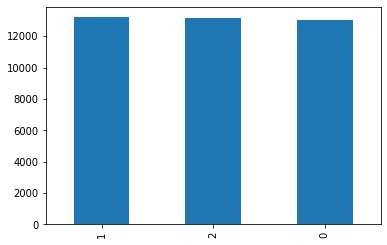

In [ ]:
#category 분포 비율 확인
train['category'].value_counts().plot(kind = 'bar')

4. 데이터 정제하기

In [ ]:
# 한글과 공백을 제외하고 모두 제거
train['data'] = train['data'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train['data'].replace('', np.nan, inplace=True)
print(train.isnull().sum())

index       0
category    0
data        0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
print(train['data'][:10])

0    신혼부부위한 주택정책 보다 보육시설 늘려주세요 국민세금으로 일부를 위한 정책펴지 마...
1    학교이름에 남자도 붙여주세요 울산여자중학교에 재학중인 학생입니다 최근 양성평등 글짓...
2    빙상연맹 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요 최근 동계올림픽에...
3    티비 세세 관람가도 연령확인 의무화 하자 제기 에전에 티비를 보다가 잠시 딴일이 생...
4    무더운 여름철엔 남성들도 시원한 자율복장을 해야 무더운 여름철에는 남성들도 노넥타이...
5    일간베스트 사이트 폐쇠를 청원합니다 국익에 전혀 도움이 되지  않고 국민에게 해를 ...
6    초중고학교 페미니즘교육의무화중복동의인원 무효처리해 주세요 국민들의 요구를 묵살해도 ...
7    수시 발표도 다 일 미뤄주세요 수능 전 발표를 피하기 위해 수능 후 발표나는 전형으...
8    여성부 폐지 청원합니다 여성이 인구 절반인데 여성 관련 정책은 보건복지부 기획재정부...
9    왜 제 수백만원짜리 녹취록을 증거로 인정해 주지 않습니까 한 사람을 잘 못 만난 죄...
Name: data, dtype: object


In [ ]:
#불용어 만들기
#분석에 해를 끼치는 단어들 삭제
#조사, 어미, 청원에 널리 사용되는 단어(사실, 대한민국, 청원, 사화 등), 분석에 의미 없는 단어(그리고, 님, 사람, 일, )
stopwords = ['말','보','생각','었','받','말','없','인','기','해','만','않','어','면','할','했','그','하','고','있','한','습니다','것','적','게','지','로','주','되','에서','다','위한','보다','도','주세요','합니다','입니다','을','를','과','와','은','는','이','가','까',
             '왜','했습니다','해주세요','위해','들','듯','였습니다','도','에','의','으로','수','과','하는','다고','세요','아니','라고','시','여','년','에게','안','성','국민','겠','아','법','등','저','라는','다는','며','된',' 라','같','까지','는데','우리','때','나','나라','사건','지만','많','이런','해야','더','해서',
             '대한','았','사실','때문','대한민국','라','청원','사회','던','화','이유','및','알','지금','님','사람','도록','좋','으면','니','내','거','일','이상','이하','만들','문제','그리고','그러나','면서','제','대','였','이나','국가','서','자','전','서','필요','정책','살','죠',
             '대해','너무','분','원','못','중','매우','될','조사','학생','피해','시간','글','됩니다','다른','번','처벌','싶','부터','이번','폐지','제도','저희','잘','명','현재','경우','평가','모든','정부','보호','또','내용','는지','길','의무','어야','돈','많이','모든','수사','차별','대통령']

In [ ]:
train['tokenized'] = train['data'].apply(mecab.morphs)
train['tokenized'] = train['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# 한글과 공백을 제외하고 모두 제거
test['data'] = test['data'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test['data'].replace('', np.nan, inplace=True)
print(train.isnull().sum())

test['tokenized'] = test['data'].apply(mecab.morphs)
test['tokenized'] = test['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

index        0
category     0
data         0
tokenized    0
dtype: int64


In [ ]:
#단어 빈도수 체크
cate_0 = np.hstack(train[train.category == 0]['tokenized'].values)
cate_1 = np.hstack(train[train.category == 1]['tokenized'].values)
cate_2 = np.hstack(train[train.category == 2]['tokenized'].values)

In [ ]:
cate_0_count = Counter(cate_0)
print(cate_0_count.most_common(30))

[('여성', 13534), ('남성', 5982), ('인권', 5881), ('피해자', 5808), ('청소년', 4705), ('남자', 4523), ('여자', 4374), ('범죄', 4262), ('평등', 3901), ('경찰', 3811), ('가족', 3460), ('가해자', 3458), ('아이', 3404), ('학교', 2881), ('자신', 2721), ('폭행', 2639), ('또한', 2489), ('부', 2333), ('건', 2328), ('못하', 2268), ('바랍니다', 2253), ('어서', 2214), ('한다', 2205), ('정말', 2169), ('없이', 2164), ('다시', 2158), ('관련', 2147), ('월', 2128), ('한다고', 2126), ('함', 2104)]


In [ ]:
cate_1_count = Counter(cate_1)
print(cate_1_count.most_common(30))

[('선수', 13481), ('방송', 5611), ('올림픽', 5383), ('대표', 4805), ('축구', 4639), ('게임', 4068), ('한국', 4002), ('감독', 3530), ('팀', 3451), ('언론', 3308), ('문화', 3094), ('경기', 2863), ('기사', 2856), ('스포츠', 2770), ('협회', 2696), ('연맹', 2611), ('뉴스', 2490), ('건', 2159), ('세계', 2013), ('평창', 1967), ('관련', 1891), ('또한', 1882), ('바랍니다', 1856), ('반대', 1848), ('빙상', 1836), ('정말', 1812), ('단일팀', 1792), ('하지만', 1782), ('댓글', 1782), ('사용', 1778)]


In [ ]:
cate_2_count = Counter(cate_2)
print(cate_2_count.most_common(30))

[('아이', 22178), ('학교', 17956), ('교육', 15522), ('교사', 11452), ('유치원', 6882), ('어린이집', 6808), ('부모', 6164), ('대학', 5526), ('선생', 5030), ('지원', 3934), ('보육', 3723), ('공부', 3715), ('초등', 3713), ('수업', 3512), ('청소년', 3510), ('시험', 3502), ('수능', 3376), ('후', 3133), ('엄마', 3120), ('영어', 3103), ('정말', 2967), ('학부모', 2900), ('가정', 2819), ('집', 2760), ('두', 2698), ('고등학교', 2657), ('못하', 2656), ('학원', 2644), ('한다고', 2597), ('학년', 2579)]


In [ ]:
#test확인
test

,index,data,tokenized,category
0,0,소년법 폐지해주세요 법 아래에서 보호받아야 할 아이들이법으로 인해 보호받지 못하고 ...,"[소년법, 아래, 아야, 아이, 인해, 못하, 오히려, 악용, 사례, 늘어나, 강도...",3
1,1,국공립 유치원 증설에 관하여 국공립 유치원 부지 학보와건립및 증설에지역 어린이 놀이...,"[국공립, 유치원, 증설, 관하, 국공립, 유치원, 부지, 학보, 건립, 증설, 지...",3
2,2,나경원파면 나경원의원의 동계올림픽 위원을 파면해 주세요,"[나경원, 파, 나경원, 의원, 동계, 올림픽, 위원, 파]",3
3,3,국민위원에가 삼성편만들어요 삼성에서 년간 일하고 혈암과 백혈병 진단을 받은 사람이...,"[위원, 삼, 성편, 어요, 삼성, 간, 혈암, 백혈병, 진단, 아요, 그래서, 산...",3
4,4,방과후유치원어린이집 영어교육을 유지시켜주세요 저는 아이 셋 키우는 평범한 주부입니다...,"[방과, 후, 유치원, 어린이집, 영어, 교육, 유지, 시켜, 아이, 셋, 키우, ...",3
...,...,...,...,...
4995,4995,페이스북 개인신상정보 개털렸는데 이대로 존경하신 문재인 대통령님 얼마전 미국본사로둔...,"[페이스북, 개인, 신상, 정보, 개, 털렸, 이대로, 존경, 신, 문재, 얼마, ...",3
4996,4996,아시안 게임에 야구프로스포츠 선수참여금지 청원합니다 뭐 대놓고 병역브로커 하자는것인...,"[아시안, 게임, 야구, 프로, 스포츠, 선수, 참여, 금지, 뭐, 대놓고, 병역,...",3
4997,4997,손흥민국가대표자격 영구박탈청원합니다 광고찍을때랑 군면제걸렸을때 소속팀 토튼햄에서만 ...,"[손흥민, 대표, 자격, 영구, 박탈, 광고, 찍, 랑, 군, 면제, 걸렸, 소속,...",3
4998,4998,한진 사모님 이명희를 구속시키는 방안을 찿아보세요 일단 밝혀진 피해자가 명입니다 아...,"[한진, 사모님, 이명희, 구속, 시키, 방안, 찿, 일단, 밝혀진, 피해자, 아직...",3


5. 정수 인코딩

In [ ]:
X_train = train['tokenized'].to_numpy()
y_train = train['category'].to_numpy()
X_test= test['tokenized'].to_numpy()
y_test = test['category'].to_numpy()

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 67627
등장 빈도가 1번 이하인 희귀 단어의 수: 22476
단어 집합에서 희귀 단어의 비율: 33.23524627737442
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.5440694828725591


In [ ]:
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 45153


In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

6. 패딩

청원 최대 길이 : 7342
청원 평균 길이 : 104.9512219907525


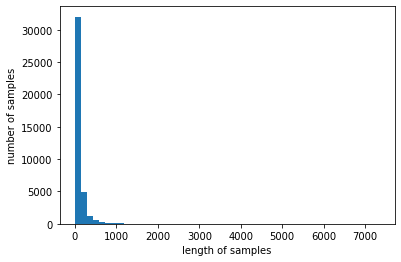

In [ ]:
print('청원 최대 길이 :',max(len(l) for l in X_train))
print('청원 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [ ]:
max_len = 500
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 500 이하인 샘플의 비율: 97.57634266551496


In [ ]:
X_train = pad_sequences(X_train, maxlen=max_len) # 훈련용 청원 패딩
X_test = pad_sequences(X_test, maxlen=max_len) # 테스트용 청원 패딩

In [ ]:
X_train.astype(np.int)

array([[    0,     0,     0, ...,  3924,  9762,    58],
       [    0,     0,     0, ...,   934,   144,    62],
       [    0,     0,     0, ..., 11461,  3221,    62],
       ...,
       [    0,     0,     0, ...,   611,  5100,    58],
       [    0,     0,     0, ...,   637,    12,   407],
       [    0,     0,     0, ...,   154,   432,   329]])

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train) # 훈련용 청원 카테고리 원-핫 인코딩
y_test = to_categorical(y_test) # 테스트용 청원 카테고리 레이블의 원-핫 인코딩

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(39362, 500)
(4975, 500)
(39362, 3)
(4975, 4)


#LSTM으로 분류하기

##학습

In [ ]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
model = Sequential()
model.add(Embedding(1000, 120))
model.add(LSTM(120))
model.add(Dense(3, activation='softmax'))


##오버피팅 발생시 자동으로 끊게 함
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history = model.fit(X_train, y_train, batch_size=128, epochs=30, callbacks=[es, mc], validation_split=0.1)

Epoch 1/30
277/277 [==============================] - 14s 44ms/step - loss: 0.6006 - acc: 0.7583 - val_loss: 0.5189 - val_acc: 0.8031

Epoch 00001: val_acc improved from -inf to 0.80315, saving model to best_model.h5
Epoch 2/30
277/277 [==============================] - 12s 43ms/step - loss: 0.4401 - acc: 0.8375 - val_loss: 0.4354 - val_acc: 0.8402

Epoch 00002: val_acc improved from 0.80315 to 0.84023, saving model to best_model.h5
Epoch 3/30
277/277 [==============================] - 12s 43ms/step - loss: 0.4071 - acc: 0.8471 - val_loss: 0.4165 - val_acc: 0.8412

Epoch 00003: val_acc improved from 0.84023 to 0.84125, saving model to best_model.h5
Epoch 4/30
277/277 [==============================] - 12s 43ms/step - loss: 0.4062 - acc: 0.8480 - val_loss: 0.5186 - val_acc: 0.8044

Epoch 00004: val_acc did not improve from 0.84125
Epoch 5/30
277/277 [==============================] - 12s 43ms/step - loss: 0.4100 - acc: 0.8438 - val_loss: 0.4339 - val_acc: 0.8387

Epoch 00005: val_acc di

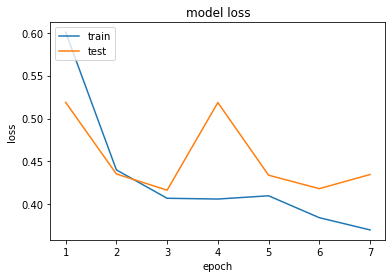

In [ ]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##예측

In [ ]:
prediction = model.predict(X_test)
for n in range(50):
  print('[{0}]'.format(n))
  print("글: ",test['data'][n])
  print("라벨: ",end = '')
  if np.argmax(prediction[n]) == 0:
    print("인권/성평등")
  if np.argmax(prediction[n]) == 1:
    print("문화/예술/체육/언론")
  if np.argmax(prediction[n]) == 2:
    print("육아/교육")
  print()

[0]
글:  소년법 폐지해주세요 법 아래에서 보호받아야 할 아이들이법으로 인해 보호받지 못하고 있습니다오히려 법을 악용하는 사례만 늘어나고그 강도는 높아지고 있습니다소년법폐지를 부탁드립니다
라벨: 인권/성평등

[1]
글:  국공립 유치원 증설에 관하여 국공립 유치원 부지 학보와건립및 증설에지역 어린이 놀이터 부지와 지역의 방대한 주민센터휴계부지 및 구청시청군청 청사공간부지 활용과 청년실업과 퇴직희망자가 재교육을 통해  유아유치 업무에 종사하는 방법은 불가능한 건가요
라벨: 육아/교육

[2]
글:  나경원파면 나경원의원의  동계올림픽 위원을 파면해 주세요
라벨: 문화/예술/체육/언론

[3]
글:  국민위원에가 삼성편만들어요 삼성에서 년간  일하고 혈암과 백혈병 진단을 받은 사람이 많아요그래서 산업 제외을 받기 위해서 환경 평가표을 받아야 합니다 그래야 신청 할 수 있습니다 법원에서도 평가표을 공개하라고 판결이 나지만 국가 국민위원에가 공개을 하지 못하겠 하고 있어요삼성이 환경평간표가 산업 기밀 이라고 다시 막았어요단 하루만에 피해자들은 년동안 고통을 받고 있는데 제발  국민위원에가  국민을 위해  일해주세요그리고 국민위원에서 독단으로 처리한 분도 다시 감독 해주세요
라벨: 문화/예술/체육/언론

[4]
글:  방과후유치원어린이집 영어교육을 유지시켜주세요 저는 아이 셋 키우는 평범한 주부입니다학교 방과후나 어린이집에서 받는 영어교육은과하지않은 도움되는 교육이라 좋은점을 많이 느끼고있는데 이렇게 없앤다고 하니 막막한 생각이 듭니다학원을 보내기쉽지않은 경제상태인데 많은 시간을 배정받은 것도 아닌데 저처럼 도움받는 분들이더욱 많은것으로 알고있는데 상황도 모르고 높은분들은 그저 토론 후 없애버리고있습니다영어를 쉽게 놀이처럼 받아들이며 배우는 작은 지역에서의영어교육은 서울 수도권처럼 과하지않습니다영어유치원 원어민 선생님과 공부하는것도 아니고 소규모지역 부모들은 이 작은 교육도 지금 받지 못하게 됐어요 서울 수도권 영어교육은 규제해야될 정도로 과열되었을지 모르나 지역